# Notebook error analysis 

## exception types for ML bugs and non-ML bugs

notebooks with python 3 version (Kaggle notebooks are almost all python 3??)

mlbugs -> ~df_err.exp_mllib.isnull()

## 1. GitHub errors

In [1]:
import pandas as pd
import config

df_mlerr_g = pd.read_excel(config.path_github_error_process.joinpath('nberror_g_all_eid_p_mlbugs.xlsx'))

path_default=WindowsPath('C:/Users/yirwa29/Downloads/Dataset-Nb')


In [38]:
df_mlerr_g_py3 = df_mlerr_g[df_mlerr_g.python_version==3]
print("Percentage of python 3 notebooks among GitHub ML error notebooks:", (df_mlerr_g_py3.fname.nunique())/(df_mlerr_g.fname.nunique()))
df_mlerr_g_py3_mlbugs = df_mlerr_g_py3[~df_mlerr_g_py3.exp_mllib.isnull()]
df_mlerr_g_py3_pybugs = df_mlerr_g_py3[df_mlerr_g_py3.exp_mllib.isnull()]
print("Percentage of mlbugs vs. all errors in GitHub ML error notebooks (py3):", len(df_mlerr_g_py3_mlbugs)/len(df_mlerr_g_py3))
print("Percentage of other py bugs vs. all errors in GitHub ML error notebooks (py3):", len(df_mlerr_g_py3_pybugs)/len(df_mlerr_g_py3))

Percentage of python 3 notebooks among GitHub ML error notebooks: 0.8424166179928412
Percentage of mlbugs vs. all errors in GitHub ML error notebooks (py3): 0.38970437219866383
Percentage of other py bugs vs. all errors in GitHub ML error notebooks (py3): 0.6102956278013362


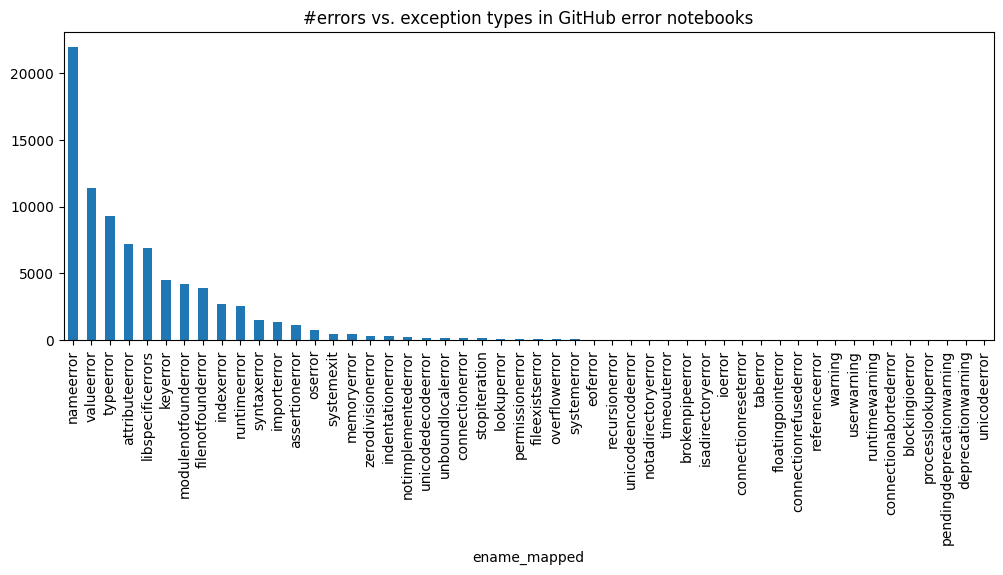

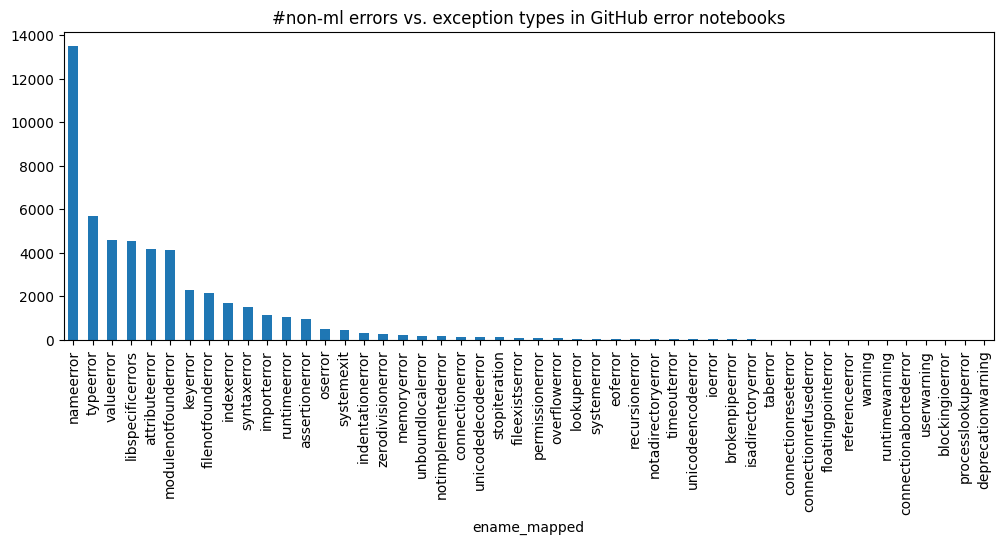

In [96]:
util.visulize_exps(df_mlerr_g_py3, title="#errors vs. exception types in GitHub error notebooks")
util.visulize_exps(df_mlerr_g_py3_pybugs, title="#non-ml errors vs. exception types in GitHub error notebooks")

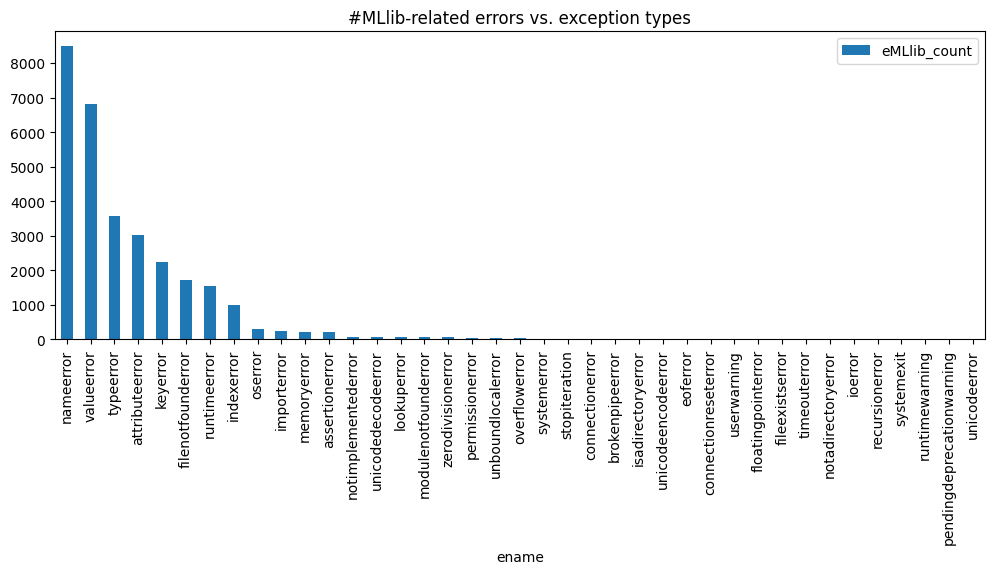

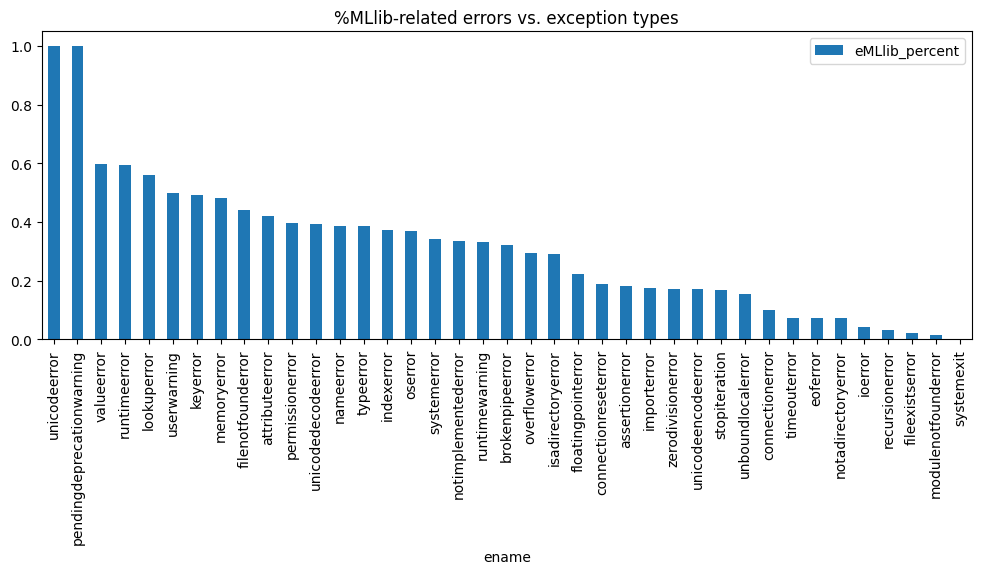

In [97]:
util.visulize_exps_mlnbs(df_mlerr_g_py3)

In [87]:
# printing tracebacks for certain exception type + related to selected libraries
import util

n = 10
print_ename = "runtimeerror"
print_tb = df_mlerr_g_py3["traceback"][(df_mlerr_g_py3["ename"]==print_ename)&~df_mlerr_g_py3["exp_mllib_extracted"].isnull()]
n = min(n,len(print_tb))
for i in range(n):
    util.print_traceback(print_tb.iloc[i])

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
/tmp/ipykernel_3228549/3644741161.py in <module>
     12 
     13 # Loss and accuracy prior to training
---> 14 vl, accuracy, _ = validate(None, valid_loader, device, model, criterion)
     15 valid_losses.extend(vl)
     16 accuracies.append(accuracy)

/tmp/ipykernel_3228549/2487186573.py in validate(mb, loader, device, model, criterion)
     27             X, Y = X.to(device), Y.to(device)
     28 
---> 29             output = model(X)
     30 
     31             loss = criterion(output, Y)

/opt/mambaforge/envs/cs152/lib/python3.9/site-packages/torch/nn/modules/module.py in _call_impl(self, *input, **kwargs)
   1100         if not (self._backward_hooks or self._forward_hooks or self._forward_pre_hooks or _global_backward_hooks
   1101                 or _global_forward_hooks or _global_forward_pre_hooks):
-> 1102             return 

## 2. Kaggle errors

In [98]:
import pandas as pd
import util, config

df_mlerr_k = pd.read_excel(config.path_kaggle_error_process.joinpath('nberror_k_eid_p_mlbugs.xlsx'))

In [99]:
df_mlerr_k_mlbugs = df_mlerr_k[~df_mlerr_k.exp_mllib.isnull()]
df_mlerr_k_pybugs = df_mlerr_k[df_mlerr_k.exp_mllib.isnull()]
print("Percentage of mlbugs vs. all errors in Kaggle ML error notebooks:", len(df_mlerr_k_mlbugs)/len(df_mlerr_k))
print("Percentage of other py bugs vs. all errors in Kaggle ML error notebooks:", len(df_mlerr_k_pybugs)/len(df_mlerr_k))

Percentage of mlbugs vs. all errors in Kaggle ML error notebooks: 0.651103129810159
Percentage of other py bugs vs. all errors in Kaggle ML error notebooks: 0.34889687018984095


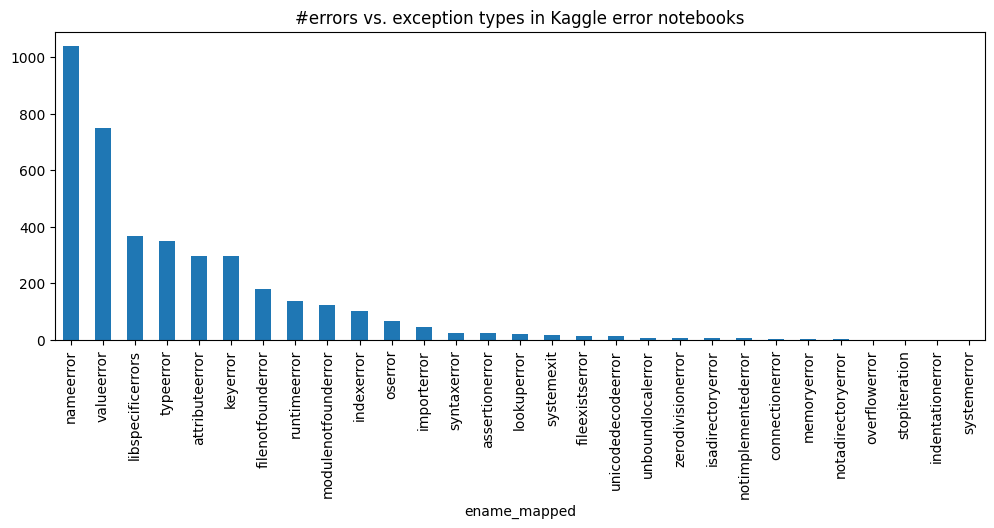

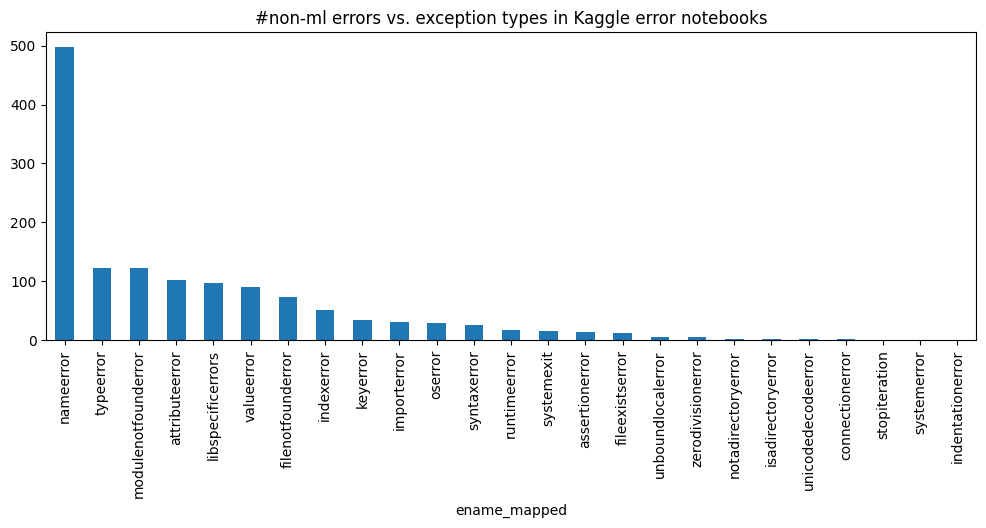

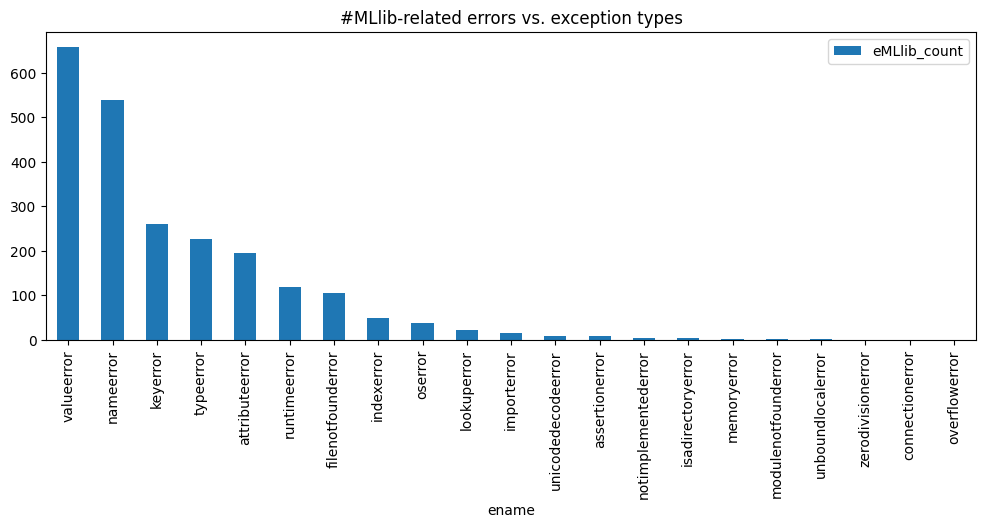

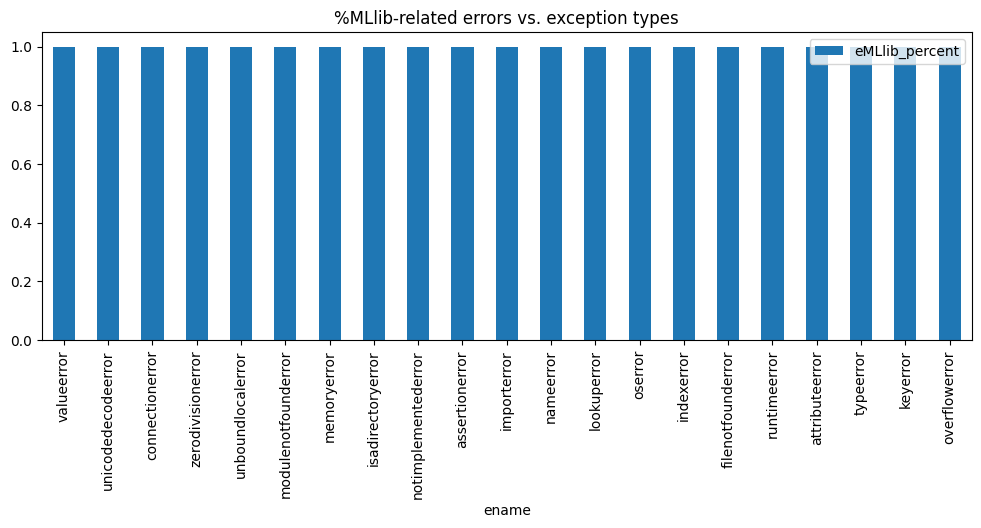

In [100]:
util.visulize_exps(df_mlerr_k, title="#errors vs. exception types in Kaggle error notebooks")
util.visulize_exps(df_mlerr_k_pybugs, title="#non-ml errors vs. exception types in Kaggle error notebooks")
util.visulize_exps_mlnbs(df_mlerr_k_mlbugs)

In [103]:
# printing tracebacks for certain exception type + related to selected libraries
import util

n = 10
print_ename = "runtimeerror"
print_tb = df_mlerr_k_mlbugs["traceback"][(df_mlerr_k_mlbugs["ename"]==print_ename)&~df_mlerr_k_mlbugs["exp_mllib"].isnull()]
n = min(n,len(print_tb))
for i in range(n):
    util.print_traceback(print_tb.iloc[i])

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
/tmp/ipykernel_24/2142163791.py in <module>
     56 
     57     extracted_fea_map_l = []
---> 58     for batch, labels in data_loader:
     59         y_pred, t_fea_map = vgg16.predict(batch.cuda())
     60 

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py in __next__(self)
    626                 # TODO(https://github.com/pytorch/pytorch/issues/76750)
    627                 self._reset()  # type: ignore[call-arg]
--> 628             data = self._next_data()
    629             self._num_yielded += 1
    630             if self._dataset_kind == _DatasetKind.Iterable and \

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py in _next_data(self)
    669     def _next_data(self):
    670         index = self._next_index()  # may raise StopIteration
--> 671         data = self._dataset_fetcher.fetch